In [27]:
import random
import numpy as np
import pandas as pd
import pylab as pl
import math
from matplotlib.colors import ListedColormap

In [28]:
def dist (a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [29]:
#Создание рандомной выборки данных
def generateData (numberOfClassEl, numberOfClasses):
    data = []
    for classNum in range(numberOfClasses):
        # Выбрать случайный центр двумерного гаусса
        centerX, centerY = random.random()*5.0, random.random()*5.0
        # Выбрать случайные узлы numberOfClassEl со среднеквадратичным значением 0,5
        for rowNum in range(numberOfClassEl):
            data.append([ [random.gauss(centerX,0.5), random.gauss(centerY,0.5)], classNum])
    return data

In [30]:
# Демонстрация распределения выборки
def showData (nClasses, nItemsInClass):
    trainData      = generateData (nItemsInClass, nClasses)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#FFFFFF'])
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()   

Для каждой точки в тестовых данных сделайте следующее:
>   
    1. Рассчитайте расстояние между данными испытаний и каждой строкой данных тренировки с помощью любого из методов, а именно: Евклидово, Манхэттенское или Хэмминговское расстояние. Наиболее часто используемый метод расчета расстояния — евклидов.
    2. Теперь, основываясь на значении расстояния, отсортируйте их в порядке возрастания.
    3. Далее он выберет верхние K строк из отсортированного массива.
    4. Теперь он назначит класс контрольной точке на основе наиболее часто встречающегося класса этих строк.

In [31]:
#распределение по признакам
def classifyKNN (trainData, testData, k, numberOfClasses):
    testLabels = []	
   
    for testPoint in testData:
        # Определение расстояния между контрольной точкой и всеми точками train выборки
        testDist = [ [dist(testPoint, trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]
        # Сколько точек каждого класса среди ближайших K
        stat = [0 for i in range(numberOfClasses)]
        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1
        testLabels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
        
    return testLabels   

In [32]:
#Демонстрация распределенной по классам выборке
def showDataOnMesh (nClasses, nItemsInClass, k):
   # Создать сетку узлов, охватывающую все случаи train
    def generateTestMesh (trainData):
        x_min = min( [trainData[i][0][0] for i in range(len(trainData))] ) - 1.0
        x_max = max( [trainData[i][0][0] for i in range(len(trainData))] ) + 1.0
        y_min = min( [trainData[i][0][1] for i in range(len(trainData))] ) - 1.0
        y_max = max( [trainData[i][0][1] for i in range(len(trainData))] ) + 1.0
        h = 0.05
        testX, testY = np.meshgrid(np.arange(x_min, x_max, h),
                                   np.arange(y_min, y_max, h))
        return [testX, testY]
    
    
    trainData      = generateData (nItemsInClass, nClasses)
    testMesh       = generateTestMesh (trainData)	
    testMeshLabels = classifyKNN (trainData, zip(testMesh[0].ravel(), testMesh[1].ravel()), k, nClasses)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#FFFFFF'])
    testColormap   = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAAA'])
    
    pl.pcolormesh(testMesh[0],
                  testMesh[1],
                  np.asarray(testMeshLabels).reshape(testMesh[0].shape),
                  cmap=testColormap)
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()

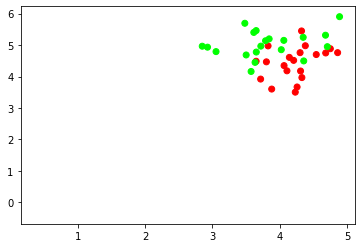

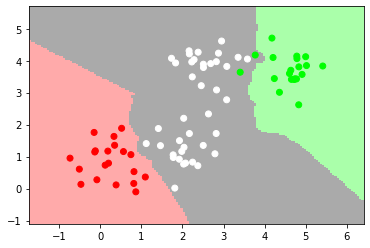

In [33]:
showData (4, 20)
showDataOnMesh(4, 20, 4)